In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv',na_values="na")

In [3]:
null_value=df.isnull().sum()

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [5]:
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    auc, 
    precision_score, 
    recall_score
)


In [6]:
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [7]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
numeric_feature=[feature for feature in df.columns if [df[feature].dtype!='O']]


In [8]:
categorical_features

['class']

In [9]:
print('number of numerical features are {}:{}'.format(len(numeric_feature),numeric_feature))

number of numerical features are 171:['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_0

In [10]:
df.head(100)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,pos,726656,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,5923458.0,2949984.0,6561588.0,5688698.0,4816786.0,2942292.0,3312658.0,74314.0,NaN,NaN
96,pos,34752,NaN,2.130706e+09,158.0,0.0,0.0,0.0,0.0,0.0,...,445964.0,226850.0,406512.0,243950.0,149538.0,73928.0,84924.0,1358.0,0.0,0.0
97,pos,352542,0.0,1.184000e+03,762.0,0.0,0.0,0.0,26212.0,340944.0,...,2918732.0,1385082.0,2862794.0,8168870.0,785760.0,146638.0,7244.0,0.0,0.0,0.0
98,pos,210474,NaN,8.240000e+02,564.0,0.0,0.0,16462.0,221266.0,1000076.0,...,1337652.0,980544.0,2129998.0,1658436.0,3384074.0,309734.0,3472.0,0.0,0.0,0.0


In [11]:
df.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

Since we make the Bar plot for the Categorical features and Histogram for the Continous variables and as in our dataset we have continous varibles only so we will be plotting the histogram so see the distribution fo data

In [12]:
for i in df.columns:
  print('The range for the feature {} is {}-{}'.format(i,max(df[i]),min(df[i])))

The range for the feature class is pos-neg
The range for the feature aa_000 is 2746564-0
The range for the feature ab_000 is 100.0-0.0
The range for the feature ac_000 is 2130706664.0-0.0
The range for the feature ad_000 is nan-nan
The range for the feature ae_000 is 21050.0-0.0
The range for the feature af_000 is 20070.0-0.0
The range for the feature ag_000 is 3376892.0-0.0
The range for the feature ag_001 is 4109372.0-0.0
The range for the feature ag_002 is 10552856.0-0.0
The range for the feature ag_003 is 29047300.0-0.0
The range for the feature ag_004 is 53962932.0-0.0
The range for the feature ag_005 is 71327916.0-0.0
The range for the feature ag_006 is 94020666.0-0.0
The range for the feature ag_007 is 63346754.0-0.0
The range for the feature ag_008 is 16926584.0-0.0
The range for the feature ag_009 is 18336298.0-0.0
The range for the feature ah_000 is 74247318.0-0.0
The range for the feature ai_000 is 16512852.0-0.0
The range for the feature aj_000 is 5629340.0-0.0
The range fo

In [13]:
df['class'].unique()

array(['pos', 'neg'], dtype=object)

Converting  the Numeric feature Class to Categorical


In [14]:
df['class']

0        pos
1        pos
2        pos
3        pos
4        pos
        ... 
36183    neg
36184    neg
36185    neg
36186    neg
36187    neg
Name: class, Length: 36188, dtype: object

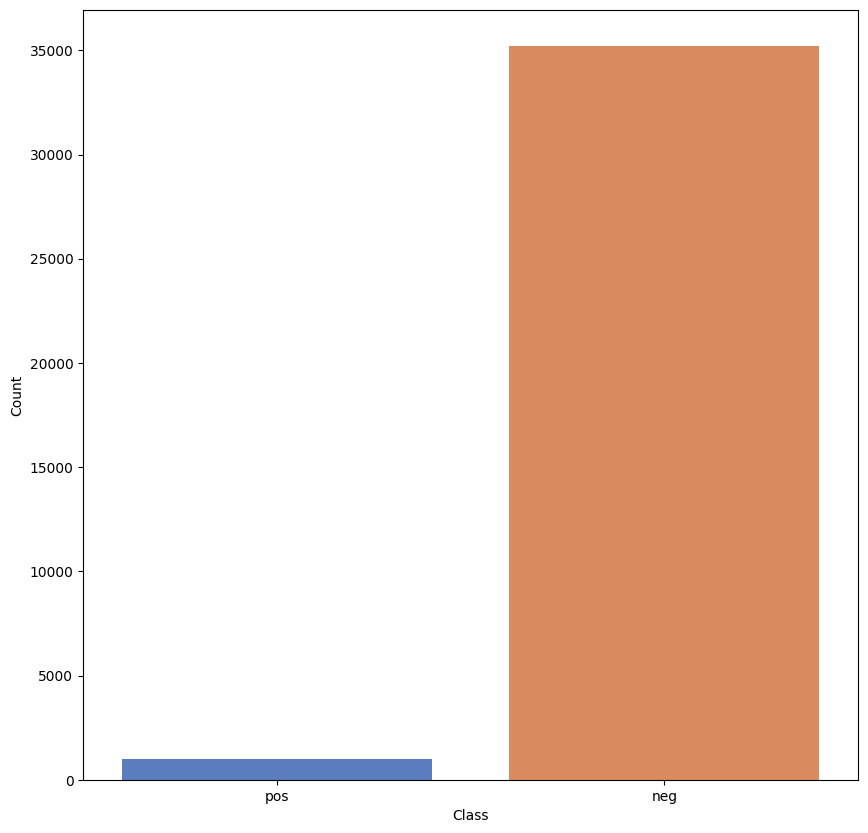

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x='class',data=df,palette='muted',hue='class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Outlier Detection

Text(0.5, 1.0, 'Missing Value Count')

<Figure size 1000x1000 with 0 Axes>

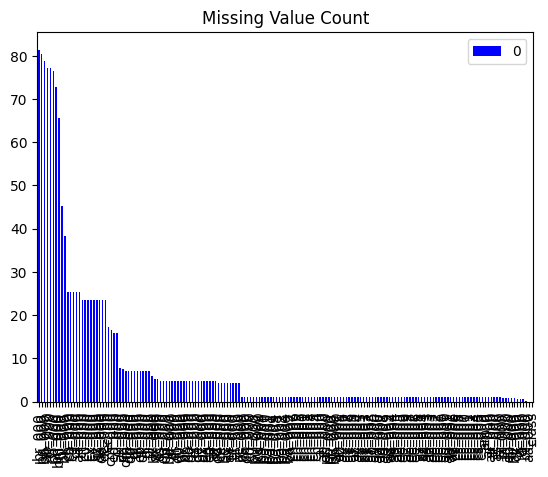

In [16]:
plt.figure(figsize=(10,10))
missing_value = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing_value.plot(kind='bar',color='blue')
plt.title('Missing Value Count')


In [17]:
dropcols=missing_value[missing_value[0]>70]

In [18]:
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [19]:
df.drop(list(dropcols.index),axis=1,inplace=True)

In [20]:
df.shape

(36188, 164)

In [21]:
df_copy=df.copy()
df_copy.drop('class',axis=1,inplace=True)

In [22]:
corr=df_copy.corr()
corr

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,-0.040516,-0.002357,0.056594,0.084137,0.022110,0.161728,0.324585,0.527440,0.650035,...,0.761236,0.766673,0.763398,0.737718,0.736037,0.611400,0.481685,0.249540,0.030219,0.031514
ac_000,-0.040516,1.000000,-0.003072,-0.006889,-0.013018,0.014824,-0.005651,-0.021448,-0.047787,-0.063542,...,-0.021699,-0.015943,-0.017273,-0.020399,-0.028861,-0.034485,0.009752,0.019985,-0.007323,0.013977
ad_000,-0.002357,-0.003072,1.000000,-0.000249,-0.000323,-0.000053,-0.000192,-0.000337,-0.000650,-0.001072,...,-0.003177,-0.003069,-0.003128,-0.001997,-0.001718,-0.001176,-0.002753,-0.001271,-0.000140,-0.000153
ae_000,0.056594,-0.006889,-0.000249,1.000000,0.846620,-0.000372,-0.000887,0.005327,0.033632,0.071238,...,0.019549,0.028035,0.019491,0.043976,0.075687,0.058486,-0.009058,-0.006994,0.108858,0.054069
af_000,0.084137,-0.013018,-0.000323,0.846620,1.000000,-0.000475,-0.001111,0.011245,0.052077,0.107682,...,0.033926,0.049022,0.034727,0.071413,0.121081,0.080443,-0.011789,-0.008967,0.173870,0.081761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.611400,-0.034485,-0.001176,0.058486,0.080443,0.001677,0.056270,0.162612,0.429441,0.673378,...,0.394321,0.387373,0.371489,0.357058,0.546662,1.000000,0.245759,0.075299,-0.000667,0.002283
ee_008,0.481685,0.009752,-0.002753,-0.009058,-0.011789,-0.001475,0.004076,0.008605,0.015855,0.054714,...,0.489963,0.516519,0.501606,0.402014,0.387333,0.245759,1.000000,0.708266,-0.006933,-0.000934
ee_009,0.249540,0.019985,-0.001271,-0.006994,-0.008967,-0.001458,-0.005416,-0.011185,-0.020664,-0.016956,...,0.243789,0.253457,0.241570,0.184429,0.168544,0.075299,0.708266,1.000000,-0.003815,0.000891
ef_000,0.030219,-0.007323,-0.000140,0.108858,0.173870,0.000086,0.004433,0.015353,0.033570,0.039377,...,0.016273,0.032959,0.014055,0.086190,0.012626,-0.000667,-0.006933,-0.003815,1.000000,0.248129


<Axes: >

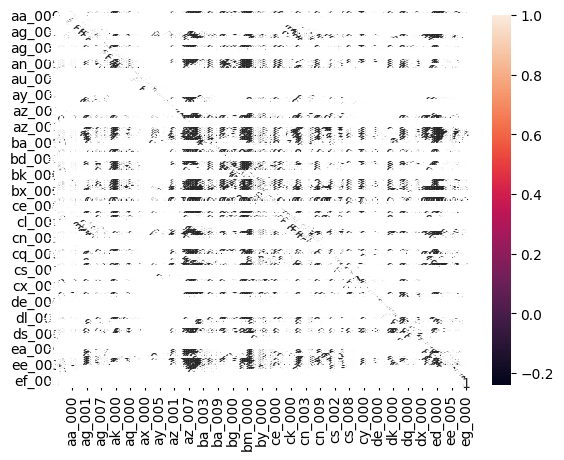

In [23]:
sns.heatmap(corr,annot=True)

In [24]:
import pandas as pd
import numpy as np  # Import NumPy directly

# Assuming your dataset is in a pandas DataFrame called 'df'
# Calculate the correlation matrix
corr_matrix = df_copy.corr()

# Create a mask to select only the upper triangle of the correlation matrix (without diagonal)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)  # Use NumPy directly here
)

# Find the feature pairs with a correlation greater than 0.8
high_corr_pairs = [(column, index, corr_value) for column, row in upper_triangle.items() for index, corr_value in row.items() if corr_value > 0.8]

# Display the feature pairs with correlation > 0.8
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"Feature pair: ({feature1}, {feature2}), Correlation: {corr_value}")


Feature pair: (af_000, ae_000), Correlation: 0.8466204288366909
Feature pair: (ag_002, ag_001), Correlation: 0.8437213892538213
Feature pair: (ag_004, ag_003), Correlation: 0.8749801535589781
Feature pair: (ag_007, ag_006), Correlation: 0.859102432677568
Feature pair: (ah_000, aa_000), Correlation: 0.9085645634971222
Feature pair: (ak_000, aj_000), Correlation: 0.9772620802895144
Feature pair: (am_0, al_000), Correlation: 0.9934991070662847
Feature pair: (an_000, aa_000), Correlation: 0.915916736602464
Feature pair: (an_000, ah_000), Correlation: 0.9881285151377353
Feature pair: (ao_000, aa_000), Correlation: 0.9212529777996991
Feature pair: (ao_000, ah_000), Correlation: 0.9730104988784821
Feature pair: (ao_000, an_000), Correlation: 0.9924978935429583
Feature pair: (ap_000, aa_000), Correlation: 0.8244917227406646
Feature pair: (ap_000, ah_000), Correlation: 0.8947464098884582
Feature pair: (ap_000, an_000), Correlation: 0.8805902037118234
Feature pair: (ap_000, ao_000), Correlation:

In [25]:
len(high_corr_pairs)

425

We are finding the feature which have the same value for all the datapoiint for this purpose we are using the means and standard deviation


In [26]:
features_sd_0=[feature for feature in df_copy.columns if df_copy[feature].std()==0]

In [27]:
features_sd_0

['cd_000']

In [28]:
from sklearn.utils import shuffle

So we have no feature which have sd 0

In [29]:
df=shuffle(df,random_state=42)
df.reset_index(drop=True,inplace=True)

ValueError: num must be an integer with 1 <= num <= 9, not 10

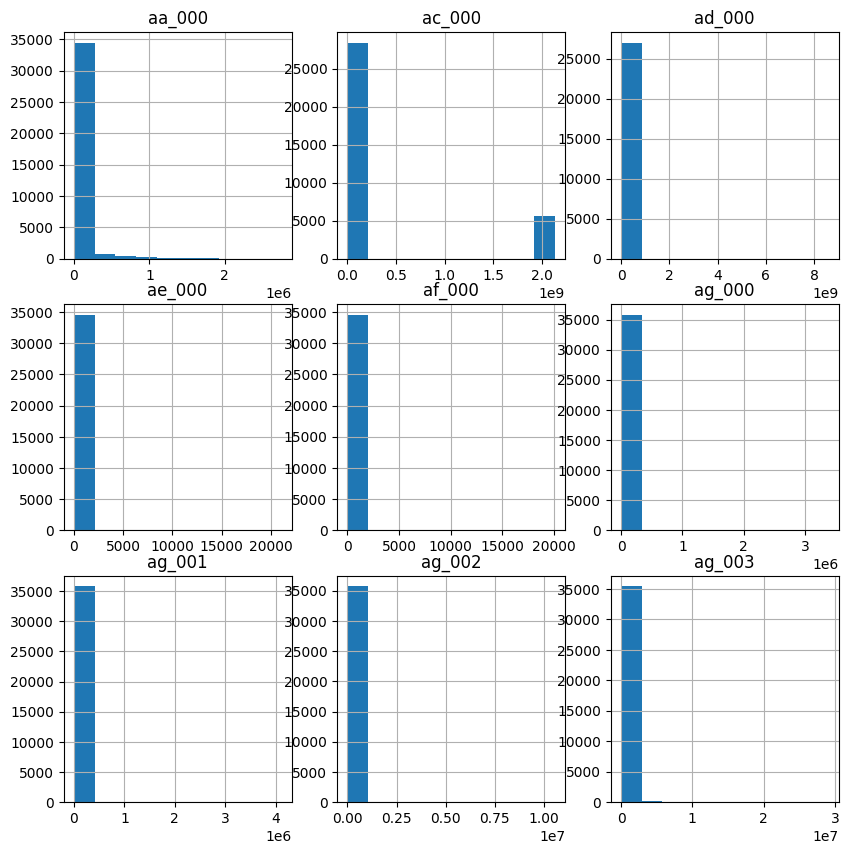

In [30]:
numeric_feature=[feature for feature in df.columns if df[feature].dtype!='O']
plt.figure(figsize=(10,10))
for i,col in   enumerate(numeric_feature):
  plt.subplot(3,3,i+1)
  df[col].hist()
  plt.title(col)

Handeling Imbalanaced Dataset

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import xgboost as xgb


In [27]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_resampled , y_resampled = smote.fit_resample()

TypeError: fit_resample() missing 2 required positional arguments: 'X' and 'y'